<a href="https://colab.research.google.com/github/JonSax88/PracticalMachineLearning/blob/main/Sax_Module2Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ingest

In [88]:
import pandas as pd
from pandas import Categorical 
import numpy as np
from pathlib import Path  
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge, RidgeCV

%matplotlib inline
sns.set()

In [14]:
df_train = pd.read_csv("/content/train.csv")
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [15]:
df_test = pd.read_csv("/content/test.csv")
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


# EDA

Management/Research Question:

How do we use the following four variables from the training set vs. the training set's Sale Prices, to create predictions of the test set's expected Sale Prices?

- OverallQual (rates overall material and finish)
- LotArea (size of lot in square feet)
- BedroomAbvGr (number of bedrooms above grade)
- GarageArea (size of garage in square feet)


In [16]:
# select subset of training data
data = df_train[["OverallQual", "LotArea", "BedroomAbvGr", "GarageArea", "SalePrice"]]
data.head()

,OverallQual,LotArea,BedroomAbvGr,GarageArea,SalePrice
0,7,8450,3,548,208500
1,6,9600,3,460,181500
2,7,11250,3,608,223500
3,7,9550,3,642,140000
4,8,14260,4,836,250000


Let's take a look at each of the four predictors' histograms and scatterplots (or stripplots, depending on appropriateness) vs. Sale Price.

Text(0.5, 1.0, 'Scatterplot')

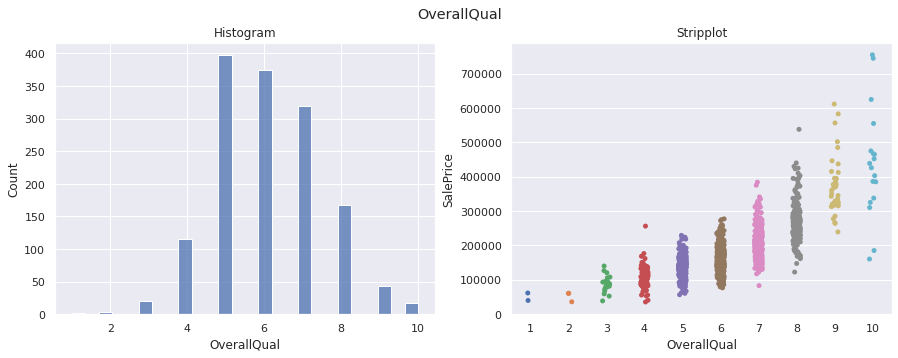

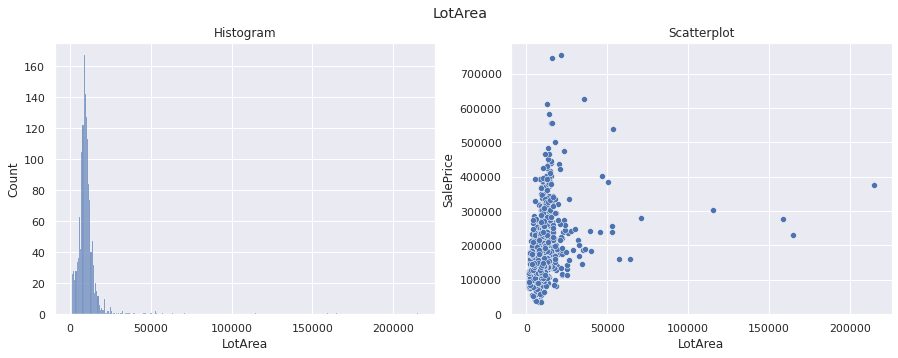

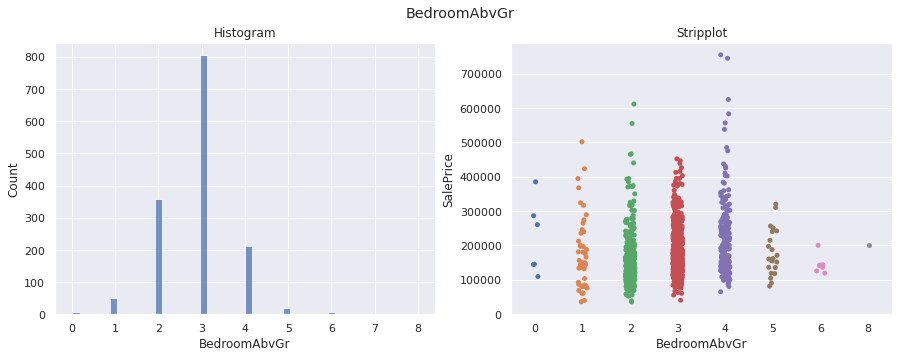

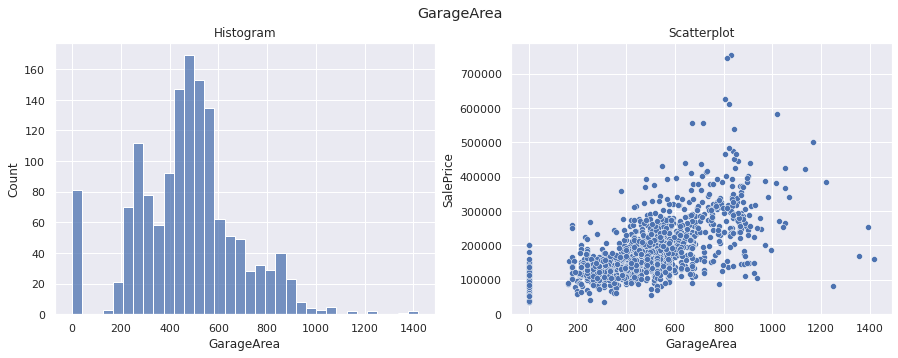

In [17]:
# OverallQual

fig, axes = plt.subplots(1, 2, figsize = (15,5))
fig.suptitle('OverallQual')

sns.histplot(data=df_train, ax=axes[0], x='OverallQual')
axes[0].set_title('Histogram')

sns.stripplot(data=df_train, ax=axes[1], x='OverallQual', y='SalePrice')
axes[1].set_title('Stripplot')

# LotArea

fig, axes = plt.subplots(1, 2, figsize = (15,5))
fig.suptitle('LotArea')

sns.histplot(data=df_train, ax=axes[0], x='LotArea')
axes[0].set_title('Histogram')

sns.scatterplot(data=df_train, ax=axes[1], x='LotArea', y='SalePrice')
axes[1].set_title('Scatterplot')

# BedroomAbvGr

fig, axes = plt.subplots(1, 2, figsize = (15,5))
fig.suptitle('BedroomAbvGr')

sns.histplot(data=df_train, ax=axes[0], x='BedroomAbvGr')
axes[0].set_title('Histogram')

sns.stripplot(data=df_train, ax=axes[1], x='BedroomAbvGr', y='SalePrice')
axes[1].set_title('Stripplot')

# GarageArea

fig, axes = plt.subplots(1, 2, figsize = (15,5))
fig.suptitle('GarageArea')

sns.histplot(data=df_train, ax=axes[0], x='GarageArea')
axes[0].set_title('Histogram')

sns.scatterplot(data=df_train, ax=axes[1], x='GarageArea', y='SalePrice')
axes[1].set_title('Scatterplot')

# Modeling

# Regression Model 1

Let's use LassoCV() function to fit the Lasso regression model and RepeatedKFold() function to perform k-fold cross validation to find the optimal alpha value to use for the penalty. I've chosen k = 5 folds and alpha = 1.

In [18]:
# define predictor and response variables
X = data[["OverallQual", "LotArea", "BedroomAbvGr", "GarageArea"]]
y = data["SalePrice"]



In [19]:
# Make a list of all numerical features

list_numerical = data.columns 
list_numerical

Index(['OverallQual', 'LotArea', 'BedroomAbvGr', 'GarageArea', 'SalePrice'], dtype='object')

In [20]:
# Standardization

scaler = StandardScaler().fit(data[list_numerical]) 
data[list_numerical] = scaler.transform(data[list_numerical])
data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,OverallQual,LotArea,BedroomAbvGr,GarageArea,SalePrice
0,0.651479,-0.207142,0.163779,0.351000,0.347273
1,-0.071836,-0.091886,0.163779,-0.060731,0.007288
2,0.651479,0.073480,0.163779,0.631726,0.536154
3,0.651479,-0.096897,0.163779,0.790804,-0.515281
4,1.374795,0.375148,1.390023,1.698485,0.869843
...,...,...,...,...,...
1455,-0.071836,-0.260560,0.163779,-0.060731,-0.074560
1456,-0.071836,0.266407,0.163779,0.126420,0.366161
1457,0.651479,-0.147810,1.390023,-1.033914,1.077611
1458,-0.795151,-0.080160,-1.062465,-1.090059,-0.488523


In [28]:
# Regression Model 1: Lasso Regression

reg = Lasso(alpha=1)
reg.fit(X, y)

Lasso(alpha=1)

In [29]:
# Model evaluation

print('R squared training set', round(reg.score(X, y)*100, 2))

# Training data
pred_train = reg.predict(X)
mse_train = mean_squared_error(y, pred_train)
print('MSE training set', round(mse_train, 2))

R squared training set 70.01
MSE training set 1891263967.83


In [30]:
# K-fold cross validation

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X, y)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [31]:
# Show best value of penalization chosen by cross validation:

model.alpha_

209067.77468299225

# Regression Model 2

Now let's use Ridge Regression to perform k-fold cross validation. I've chosen k = 10 folds with 3 repeats at default alpha levels of 0.1, 1.0, and 10.0.

In [33]:
# define predictor and response variables
X2 = df_train[["OverallQual", "LotArea", "BedroomAbvGr", "GarageArea"]]
y2 = df_train["SalePrice"]


In [34]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
model2 = RidgeCV(cv=cv, scoring='neg_mean_absolute_error')

#fit model
model2.fit(X2, y2)

#display lambda that produced the lowest test MSE
print(model2.alpha_)

10.0


# Prediction

Now let's use this Ridge Regression model to make Sale Price predictions on the test set.

In [49]:
# define new observation

newdata = df_test[["OverallQual", "LotArea", "BedroomAbvGr", "GarageArea"]]
newdata

# isolate the first observation

row1 = newdata.iloc[0]
row1

row1values = [5, 11622, 2, 730]

model2.predict([row1values])


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  "X does not have valid feature names, but"


array([158908.11617188])

In [50]:
newdata2 = newdata.dropna()
newdata2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1458
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1458 non-null   int64  
 1   LotArea       1458 non-null   int64  
 2   BedroomAbvGr  1458 non-null   int64  
 3   GarageArea    1458 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 57.0 KB


In [51]:
test_predict = model2.predict(newdata2)
print(test_predict)

[158908.11617188 168412.43359945 146492.93993625 ... 168757.68541401
 100162.60466923 229128.81088229]


We now have predictions for all of the test set's sale prices, in the form of an array. Let's return this to a dataframe and concatenate house Id so it's in the correct format to submit to Kaggle.

In [76]:
prediction2 = pd.DataFrame(test_predict, columns = ['SalePrice'])
prediction2

,SalePrice
0,158908.116172
1,168412.433599
2,146492.939936
3,177335.664842
4,240628.109795
...,...
1453,53930.209329
1454,79039.463521
1455,168757.685414
1456,100162.604669


In [84]:
# There was one null GarageArea entry that we had to drop before concatenation.

prediction = pd.DataFrame(df_test, columns = ['Id', 'GarageArea'])
prediction = prediction.dropna()
prediction = prediction.drop(['GarageArea'], axis=1)
prediction

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [90]:
result = pd.concat([prediction, prediction2], axis =1, join='inner')
display(result)

,Id,SalePrice
0,1461,158908.116172
1,1462,168412.433599
2,1463,146492.939936
3,1464,177335.664842
4,1465,240628.109795
...,...,...
1453,2914,53930.209329
1454,2915,79039.463521
1455,2916,168757.685414
1456,2917,100162.604669


In [91]:
result.to_csv(index=False)
filepath = Path("/content/result.csv")
filepath.parent.mkdir(parents=True, exist_ok=True)
result.to_csv(filepath)

# Conclusion

If we were to create a piecewise linear regression model with each of the four predictor variables carrying a certain weight (coefficient) at each input value (house), we would be assuming that the ~1,460 sale prices would be representative of all Aimes, Iowa homes' sale prices. After a quick Google search, it appears that roughly 66,000 people live in Aimes, IA. Additionally, the city averages 2.21 people per household. Therefore, the true value of N is roughly ~31,428. While having ~1,460 entries (4%) will inevitably result in some sampling error, this is a relatively large / representative sample when compared to other surveys. 

In layman's terms, the four variables contributing to our R^2 in our training set outputted 70.01, meaning that 70% of all movements in Sale Price can be explained by movements in our four predictor variables (OverallQual, LotArea, BedroomAbvGr, and GarageArea).
